### Student Information
Name: 賴嘉閎

Student ID: 110034029

GitHub ID: Henry0517code

Kaggle name: LAI JIA HONG

Kaggle private scoreboard snapshot:

![Snapshot](./img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

---
### Take Home Exercises

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [1]:
%pip install plotly_express


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import plotly_express as px

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = list(stopwords.words('english'))

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /Users/henry/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
train_df = pd.read_pickle('../data/train_df.pkl')
test_df = pd.read_pickle('../data/test_df.pkl')

In [4]:
BOW_vectorizer_train = CountVectorizer(max_features=30, tokenizer=nltk.word_tokenize, stop_words=stop_words)
BOW_vectorizer_train.fit_transform(train_df['text'])
BOW_vectorizer_test = CountVectorizer(max_features=30, tokenizer=nltk.word_tokenize, stop_words=stop_words)
BOW_vectorizer_test.fit_transform(test_df['text'])

<347x30 sparse matrix of type '<class 'numpy.int64'>'
	with 1061 stored elements in Compressed Sparse Row format>

In [5]:
word_freq_train = pd.DataFrame({'word': list(BOW_vectorizer_train.vocabulary_.keys()),
                               'frequency': list(BOW_vectorizer_train.vocabulary_.values())})
word_freq_train = word_freq_train.sort_values('frequency', ascending=False)

word_freq_test = pd.DataFrame({'word': list(BOW_vectorizer_test.vocabulary_.keys()),
                               'frequency': list(BOW_vectorizer_test.vocabulary_.values())})
word_freq_test = word_freq_test.sort_values('frequency', ascending=False)

In [6]:
px.bar(word_freq_train, x='word', y='frequency', title='Word Frequency Train')

In [7]:
px.bar(word_freq_test, x='word', y='frequency', title='Word Frequency Test')

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /Users/henry/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
TFIDF_Vectorizer_1000 = TfidfVectorizer(max_features=1000, stop_words='english')
TFIDF_Vectorizer_1000.fit(train_df['text'])
TFIDF_feature_names = TFIDF_Vectorizer_1000.get_feature_names_out()
TFIDF_feature_names[100:110]

array(['blue', 'blues', 'body', 'boiling', 'book', 'boss', 'bought',
       'bout', 'boy', 'break'], dtype=object)

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

### Answer here
1. The negative diagonal shows the number of labels correctly classified. Four squres on the line are deeper than the others, which indicates the model basically works fine.

2. It's worth noting that squares besides of those four with more than 10 might indicate the model is weaker in certain classification tasks (eg. fear is relatively likely to be mislabeled as sadness).

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
BOW_500.fit(train_df['text'])

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion'] # target

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

In [11]:
from sklearn.naive_bayes import MultinomialNB
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)

MultinomialNB()

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

training accuracy: 0.79
testing accuracy: 0.7
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



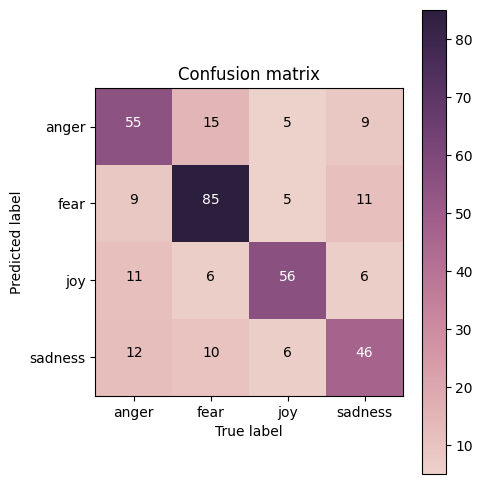

In [15]:
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

print(classification_report(y_true=y_test, y_pred=y_test_pred))

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

### Answer here

Decision Trees can overfit the training data if the tree grows too deep. Naive Bayes is less likely to be overfitting due to its simpler assumptions. As a result, the size of the dataset impacts model performance. Naive Bayes can perform well even with small datasets, while Decision Trees might require more data to prevent from overfitting.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="../pics/pic3.png" style="width: 500px;"/> </td>
    <td><img src="../pics/pic4.png" style="width: 500px;"/> </td>
</tr></table>



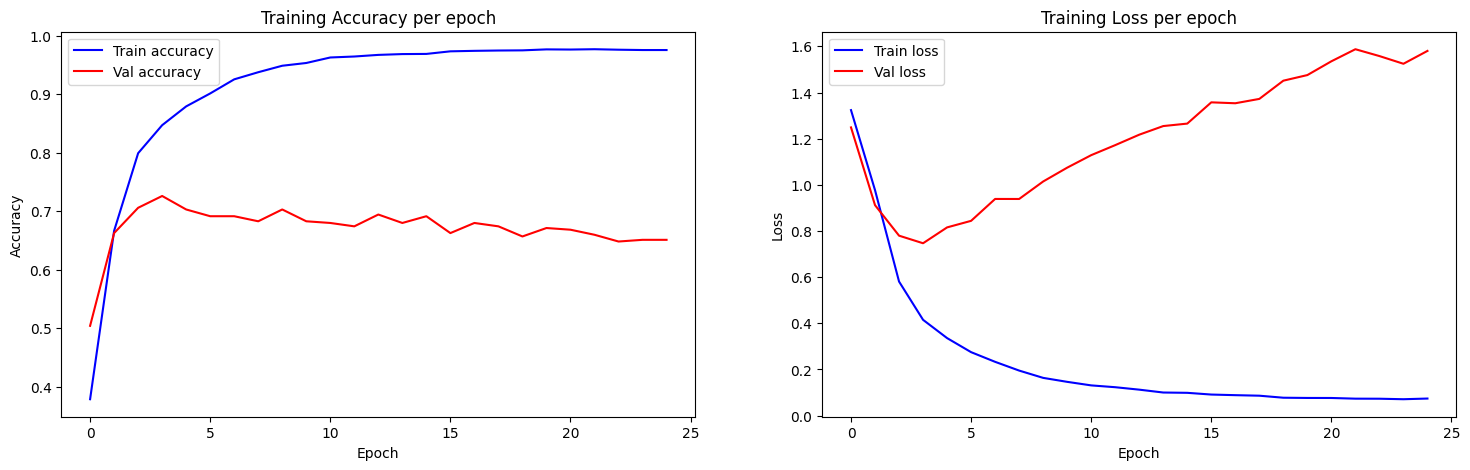

In [16]:
import matplotlib.pyplot as plt

training_log = pd.DataFrame()
training_log = pd.read_csv("../logs/training_log.csv")

fig, axs = plt.subplots(ncols=2, figsize=(18, 5))

axs[0].plot(training_log['epoch'], training_log['accuracy'], color='blue', label='Train accuracy')
axs[0].plot(training_log['epoch'], training_log['val_accuracy'], color='red', label='Val accuracy')
axs[0].set_title('Training Accuracy per epoch')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

axs[1].plot(training_log['epoch'], training_log['loss'], color='blue', label='Train loss')
axs[1].plot(training_log['epoch'], training_log['val_loss'], color='red', label='Val loss')
axs[1].set_title('Training Loss per epoch')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()

fig.show()

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [19]:
# Answer here
# use get_mean_vector to calculate the vector representing a list of words
import gensim.downloader as api
glove_twitter_25_model = api.load("glove-twitter-25")
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df['w2v'] = train_df['text_tokenized'].map(lambda x: glove_twitter_25_model.get_mean_vector(x))

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [21]:
# Answer here
from gensim.models import KeyedVectors
model_path = "../GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

word_list = ['happy', 'angry', 'data', 'mining']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

target_words = happy_words + angry_words + data_words + mining_words

cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

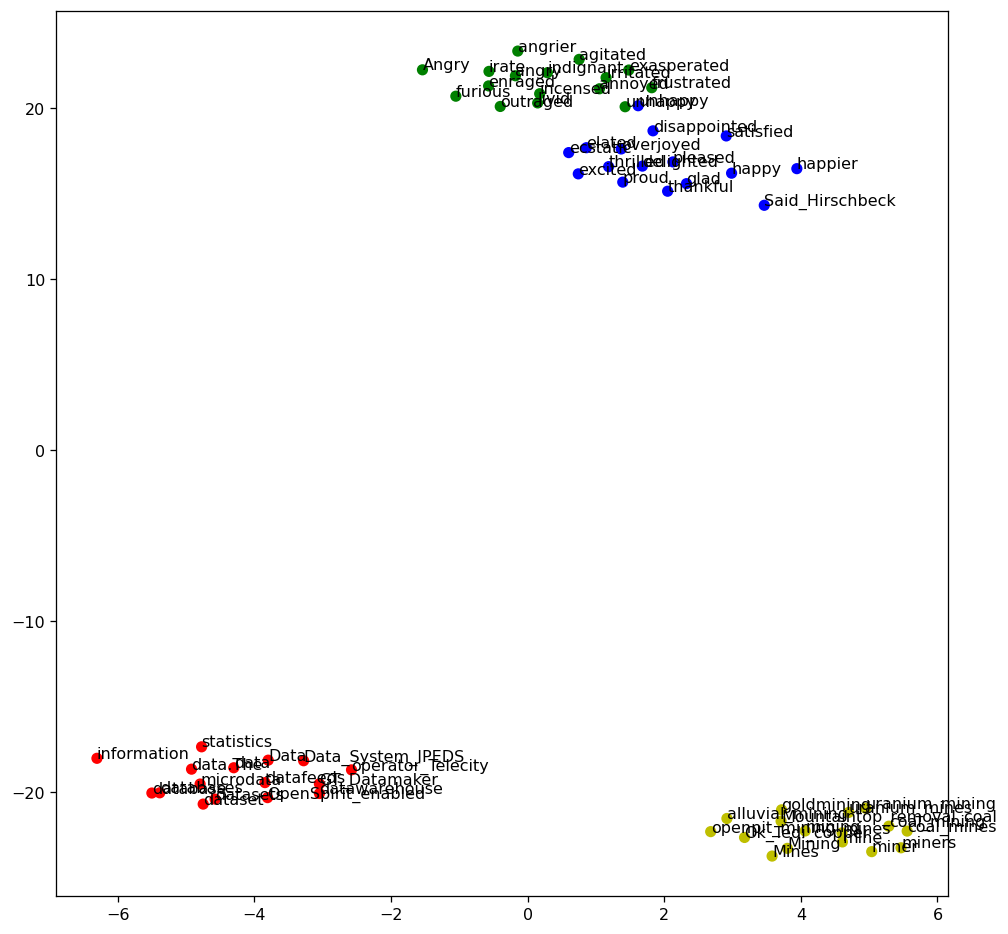

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(10, 10), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---
### Competition Report

---
### Setups

1. Import datasets and modules

In [ ]:
import numpy as np
import pandas as pd
import json
import os
import gc

import keras
from  keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from sklearn.metrics import classification_report
import scikitplot
from scikitplot.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import accuracy_score
from keras.utils import pad_sequences
from keras.models import Sequential, model_from_json
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.layers import LSTM,Bidirectional,Dense,Embedding,Dropout
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
tweets = []
with open('/kaggle/input/emotion-dataset/tweets_DM.json', 'r') as file:
    for line in file:
        json_data = json.loads(line)
        tweets.append(json_data['_source']['tweet'])

tweets = pd.json_normalize(tweets)

In [ ]:
tweets = tweets[['tweet_id', 'hashtags', 'text']]

In [ ]:
tweets

,tweet_id,hashtags,text
0,0x376b20,[Snapchat],"People who post ""add me on #Snapchat"" must be ..."
1,0x2d5350,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #..."
2,0x28b412,[bibleverse],"Confident of your obedience, I write to you, k..."
3,0x1cd5b0,[],Now ISSA is stalking Tasha 😂😂😂 <LH>
4,0x2de201,[],"""Trust is not the same as faith. A friend is s..."
...,...,...,...
1867530,0x316b80,"[mixedfeeling, butimTHATperson]",When you buy the last 2 tickets remaining for ...
1867531,0x29d0cb,[],I swear all this hard work gone pay off one da...
1867532,0x2a6a4f,[],@Parcel2Go no card left when I wasn't in so I ...
1867533,0x24faed,[],"Ah, corporate life, where you can date <LH> us..."


In [ ]:
print(type(tweets['hashtags'][0]))
print(type(tweets['tweet_id'][0]))
print(type(tweets['text'][0]))

<class 'list'>
<class 'str'>
<class 'str'>


In [ ]:
data_identification = pd.read_csv('/kaggle/input/emotion-dataset/data_identification.csv')

In [ ]:
data_identification

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train
...,...,...
1867530,0x227e25,train
1867531,0x293813,train
1867532,0x1e1a7e,train
1867533,0x2156a5,train


In [ ]:
emotion = pd.read_csv('/kaggle/input/emotion-dataset/emotion.csv')

In [ ]:
emotion

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation
...,...,...
1455558,0x38dba0,joy
1455559,0x300ea2,joy
1455560,0x360b99,fear
1455561,0x22eecf,joy


In [ ]:
sample_submission = pd.read_csv('/kaggle/input/emotion-dataset/sampleSubmission.csv')

In [ ]:
sample_submission

,id,emotion
0,0x2c7743,surprise
1,0x2c1eed,surprise
2,0x2826ea,surprise
3,0x356d9a,surprise
4,0x20fd95,surprise
...,...,...
411967,0x351857,surprise
411968,0x2c028e,surprise
411969,0x1f2430,surprise
411970,0x2be24e,surprise


---
### Datasets

1. Create train and test datasets.
   
2. EDA -> most of the data is joy

3. Tried balancing the dataset (reduce joy data or sample equal amount of data from each -> model performed badly on joy -> score reduced significantly)

In [ ]:
train = tweets.merge(data_identification, on='tweet_id', how='outer')
train = train.merge(emotion, on='tweet_id', how='outer')

In [ ]:
test = train[train['identification'] == 'test']

In [ ]:
train = train[train['identification'] == 'train']

In [ ]:
# sample_size = 35000

# temp = train[train['emotion'] == 'joy']
# temp = temp.sample(sample_size)
# train = pd.concat([train[train['emotion'] != 'joy'], temp])

# temp = train[train['emotion'] == 'anticipation']
# temp = temp.sample(sample_size)
# train = pd.concat([train[train['emotion'] != 'anticipation'], temp])

# temp = train[train['emotion'] == 'trust']
# temp = temp.sample(sample_size)
# train = pd.concat([train[train['emotion'] != 'trust'], temp])

# temp = train[train['emotion'] == 'sadness']
# temp = temp.sample(sample_size)
# train = pd.concat([train[train['emotion'] != 'sadness'], temp])

# temp = train[train['emotion'] == 'disgust']
# temp = temp.sample(sample_size)
# train = pd.concat([train[train['emotion'] != 'disgust'], temp])

# temp = train[train['emotion'] == 'fear']
# temp = temp.sample(sample_size)
# train = pd.concat([train[train['emotion'] != 'fear'], temp])

# temp = train[train['emotion'] == 'surprise']
# temp = temp.sample(sample_size)
# train = pd.concat([train[train['emotion'] != 'surprise'], temp])

# temp = train[train['emotion'] == 'anger']
# temp = temp.sample(sample_size)
# train = pd.concat([train[train['emotion'] != 'anger'], temp])

In [ ]:
px.bar(train['emotion'].value_counts(), title='Count of Emotions')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train = train.sample(frac=0.5)

In [ ]:
train, validation = train_test_split(train, test_size=0.2, random_state=42)

---
### Preprocessing

1. Tokenize every sentence and pad them into equal length (300)
   
2. Transform labels into encodings

In [ ]:
X = train['text']
lst=[]
for i in X:
    lst.append(len(i))
len1 = pd.DataFrame(lst)
len1.describe()

,0
count,465780.000000
mean,88.161785
std,34.930963
min,9.000000
25%,59.000000
50%,91.000000
75%,120.000000
max,202.000000


In [ ]:
tokenizer = Tokenizer(lower=True, oov_token='UNK')
tokenizer.fit_on_texts(X)

In [ ]:
len(tokenizer.word_index)

395094

In [ ]:
X_train = tokenizer.texts_to_sequences(X)
X_train_pad = pad_sequences(X_train, maxlen=300, padding='pre')

In [ ]:
train['emotion'] = train.emotion.replace({
    'joy' :0, 
    'anticipation' :1, 
    'trust' :2, 
    'sadness': 3, 
    'disgust': 4, 
    'fear': 5, 
    'surprise': 6,
    'anger': 7
})
Y_train = train['emotion'].values

In [ ]:
Y_train_f = to_categorical(Y_train)

In [ ]:
X_val = validation['text']
validation['emotion'] = validation.emotion.replace({
    'joy' :0, 
    'anticipation' :1, 
    'trust' :2, 
    'sadness': 3, 
    'disgust': 4, 
    'fear': 5, 
    'surprise': 6,
    'anger': 7
})
Y_val = validation.emotion
X_val_f = tokenizer.texts_to_sequences(X_val)
X_val_pad = pad_sequences(X_val_f, maxlen=300, padding='pre')
Y_val_f = to_categorical(Y_val)

---
### Model

1. Use a DL model
   
2. Use a embedding layer to represent each word as a vector
   
3. Use a dropout layer to prevent from overfitting

4. Use a Bidirectional LSTM to understand the meaning of the sentence because it's good at capturing both past and future contexts of a sequence

5. Use a dense layer with softmax to output

6. Because LSTM costs a lots of resources, I kept the model simple, which still needs 15 min to finish one epoch 

In [ ]:
len(tokenizer.index_word) + 1

395095

In [ ]:
model=Sequential()
model.add(Embedding(395095, 64, input_length=300))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(160, return_sequences=True)))
model.add(Bidirectional(LSTM(80)))
model.add(Dense(8, activation='softmax'))
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 300, 64)           25286080  
                                                                 
 dropout_8 (Dropout)         (None, 300, 64)           0         
                                                                 
 bidirectional_23 (Bidirect  (None, 300, 320)          288000    
 ional)                                                          
                                                                 
 bidirectional_24 (Bidirect  (None, 160)               256640    
 ional)                                                          
                                                                 
 dense_11 (Dense)            (None, 8)                 1288      
                                                                 
Total params: 25832008 (98.54 MB)
Trainable params: 2

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# reduce learning rate if the val_accuracy is not improving
rlrp = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)

# early stop if the val_accuracy is not improving
earlystopping = EarlyStopping(monitor ="val_accuracy", mode = 'auto', patience = 4, restore_best_weights = True)

hist = model.fit(X_train_pad, Y_train_f, epochs=1, validation_data=(X_val_pad, Y_val_f), callbacks=[rlrp, earlystopping])

14556/14556 [==============================] - 791s 54ms/step - loss: 1.2726 - accuracy: 0.5412 - val_loss: 1.1707 - val_accuracy: 0.5787 - lr: 0.0010


In [ ]:
model_name = 'Emotion_Model_LSTM_2.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Save model and weights at %s ' % model_path)

model_json = model.to_json()
with open("Emotion_Model_LSTM_2", "w") as json_file:
    json_file.write(model_json)

Save model and weights at /kaggle/working/saved_models/Emotion_Model_LSTM_2.h5 


---
### Validation

1. First chart shows that when training for multiple epochs, there seemed to be overfitting. As a result, I only trained for one epoch at the end

2. In the classification_report we can see that those with smaller data got misclassified frequently and it happens greatly when model overfits

3. In the confusion matrix we can see that there's a lot of data being misclasiified as 'joy'. While a small and balance dataset did not work out fine, maybe using the other datasets to fill them would help

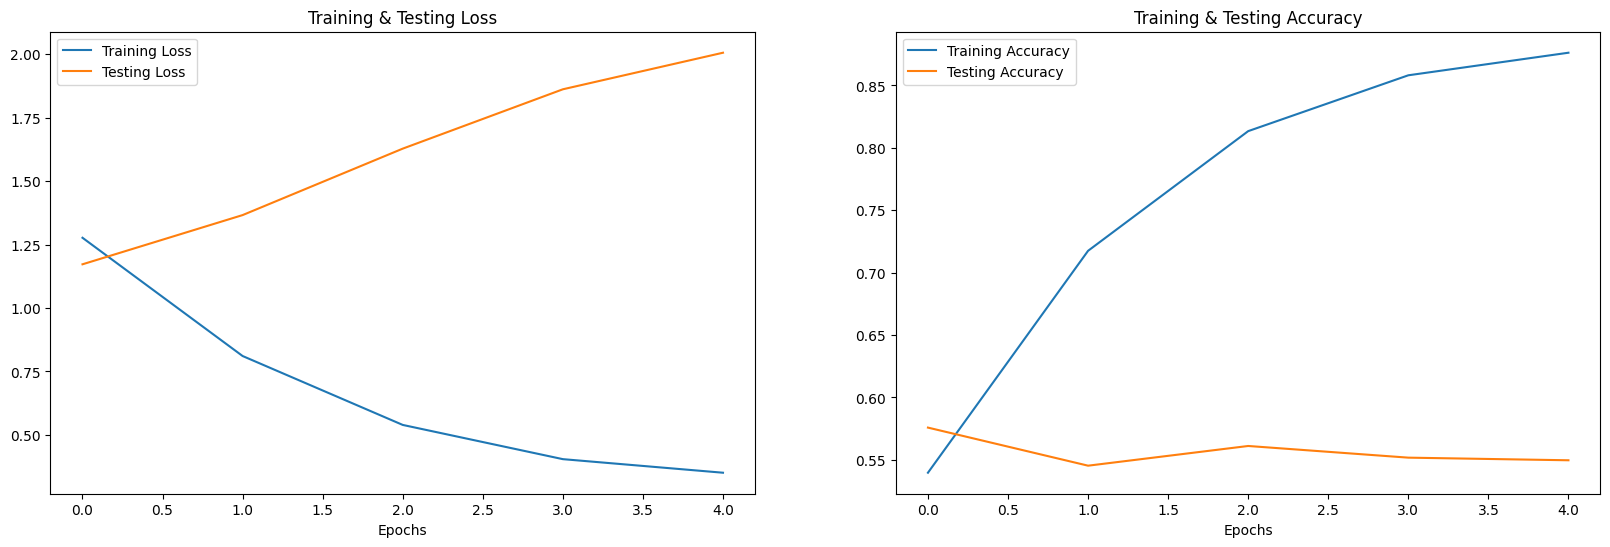

In [ ]:
epochs = [i for i in range(5)]
fig, ax = plt.subplots(1, 2)
train_acc = hist.history['accuracy']
train_loss = hist.history['loss']
test_acc = hist.history['val_accuracy']
test_loss = hist.history['val_loss']

fig.set_size_inches(20, 6)
ax[0].plot(epochs, train_loss ,label = 'Training Loss')
ax[0].plot(epochs, test_loss ,label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs ,train_acc ,label = 'Training Accuracy')
ax[1].plot(epochs ,test_acc ,label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
Y_pred = np.argmax(model.predict(X_val_pad), axis=1)
print(classification_report(Y_val, Y_pred))

3639/3639 [==============================] - 61s 16ms/step
              precision    recall  f1-score   support

           0       0.60      0.78      0.68     40915
           1       0.64      0.60      0.62     20123
           2       0.67      0.33      0.45     16641
           3       0.47      0.57      0.51     15407
           4       0.46      0.44      0.45     11135
           5       0.57      0.44      0.50      5045
           6       0.76      0.22      0.34      3934
           7       0.61      0.26      0.37      3245

    accuracy                           0.58    116445
   macro avg       0.60      0.46      0.49    116445
weighted avg       0.59      0.58      0.56    116445



Accuracy of our model on test data based on emotions:  57.99999999999999 %


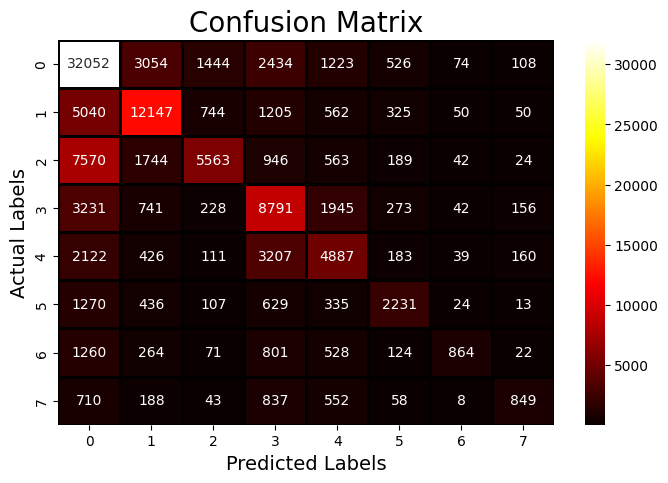

In [ ]:
c = confusion_matrix(Y_val, Y_pred)
print("Accuracy of our model on test data based on emotions: ", round(accuracy_score(Y_val, Y_pred), 2) * 100, "%")

plt.figure(figsize=(8, 5))
c = pd.DataFrame(c, index = [i for i in range(8)] ,columns = [i for i in range(8)])
sns.heatmap(c, linecolor='Black', cmap='hot', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

# Submission

In [ ]:
X_test = test['text']
test['emotion'] = test.emotion.replace({
    'joy' :0, 
    'anticipation' :1, 
    'trust' :2, 
    'sadness': 3, 
    'disgust': 4, 
    'fear': 5, 
    'surprise': 6,
    'anger': 7
})
X_test_f = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_f, maxlen=300, padding='pre')

Y_pred = np.argmax(model.predict(X_test_pad), axis=1)

12875/12875 [==============================] - 209s 16ms/step


In [ ]:
test['emotion'] = Y_pred
test['emotion'] = test.emotion.replace({
    0: 'joy',
    1: 'anticipation',
    2: 'trust',
    3: 'sadness',
    4: 'disgust',
    5: 'fear',
    6: 'surprise',
    7: 'anger'
})

In [ ]:
sub = test[['tweet_id', 'emotion']]
sub = sub.reset_index(drop=True)
sub.columns = ['id', 'emotion']
sub = sample_submission.drop(columns=['emotion']).merge(sub, on='id', how='left')
sub.to_csv('submission.csv', index=False)

In [ ]:
sub

,id,emotion
0,0x2c7743,joy
1,0x2c1eed,joy
2,0x2826ea,sadness
3,0x356d9a,joy
4,0x20fd95,joy
...,...,...
411967,0x351857,sadness
411968,0x2c028e,sadness
411969,0x1f2430,sadness
411970,0x2be24e,joy
